In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk
import pandas as pd
import re


In [23]:
with open("assassination_attempt/cheatle_hearing.txt", "r") as file:
    cheatle_hearing = file.read()
print(cheatle_hearing) 

with open("assassination_attempt/cheatle_statement.txt", "r") as file:
    cheatle_statement = file.read()
print(cheatle_statement) 


with open("assassination_attempt/rowe_hearing.txt", "r") as file:
    rowe_hearing = file.read()

print(rowe_hearing) 

with open("assassination_attempt/rowe_testimony.txt", "r", encoding="utf-8") as file:
    rowe_statement = file.read()
print(rowe_statement) 

Transcript


0:00
presenting an active threat so I'd like to ask you director cheeter to clarify the protoc what the protocol is for
0:05
postponing or canceling an event based on a threat and how the events on July 13th didn't meet those
0:12
standards so again I think we're talking about the distinction between suspicious behavior and a threat and at the time
0:20
that this individual was identified they were displaying suspicious to behavior I'm still waiting for interviews from
0:27
the FBI to determine what it was that identified that individual as suspicious
0:33
and what those behaviors were to to that question is suspicious Behavior does suspicious Behavior vary between
0:39
different events for instance if we have an event with a president would there not be a heightened standard for
0:44
suspicious Behavior I think that there are a number of ways that someone could be identified
0:50
as suspicious uh and it doesn't matter whether it's at a rally or an indoor
0:56
event or who

## Text Preprocess Cleaning

In [35]:
# cheatle_statement = cheatle_statement.lower()
documents = {}

with open("assassination_attempt/cheatle_hearing.txt", "r") as file:
    documents["cheatle_hearing"] = file.read()

with open("assassination_attempt/cheatle_statement.txt", "r") as file:
    documents["cheatle_statement"] = file.read()

with open("assassination_attempt/rowe_hearing.txt", "r") as file:
    documents["rowe_hearing"] = file.read()

with open("assassination_attempt/rowe_testimony.txt", "r", encoding="utf-8") as file:
    documents["rowe_statement"] = file.read()

def tokenize_rawtxt(text):
    # first convert to lowercase
    lower_txt = text.lower()
    tokenize_txt = nltk.tokenize.word_tokenize(lower_txt) # tokenize 
    return (text, tokenize_txt)

for doc_name, text in documents.items():
    raw_text, tokens = tokenize_rawtxt(text)
    documents[doc_name] = tokens

for k, v in documents.items():
    documents[k] = [word for word in v if word.isalpha()]

print("First 20 tokens from 'cheatle_hearing':")
print(documents["cheatle_hearing"][:20])

print("First 20 tokens from 'cheatle_statement':")
print(documents["cheatle_statement"][:20])

print("First 20 tokens from 'rowe_hearing':")
print(documents["rowe_hearing"][:20])

print("First 20 tokens from 'rowe_statement':")
print(documents["rowe_statement"][:20])


First 20 tokens from 'cheatle_hearing':
['transcript', 'presenting', 'an', 'active', 'threat', 'so', 'i', 'like', 'to', 'ask', 'you', 'director', 'cheeter', 'to', 'clarify', 'the', 'protoc', 'what', 'the', 'protocol']
First 20 tokens from 'cheatle_statement':
['written', 'testimony', 'from', 'director', 'kimberly', 'cheatle', 'to', 'the', 'oversight', 'committee', 'on', 'the', 'attempted', 'assassination', 'of', 'former', 'president', 'trump', 'published', 'by']
First 20 tokens from 'rowe_hearing':
['launched', 'in', 'which', 'we', 'launched', 'shortly', 'after', 'the', 'assassination', 'attempt', 'took', 'place', 'our', 'teams', 'are', 'still', 'collecting', 'critical', 'information', 'speaking']
First 20 tokens from 'rowe_statement':
['good', 'morning', 'chairman', 'peters', 'chairman', 'durbin', 'ranking', 'member', 'paul', 'ranking', 'member', 'graham', 'and', 'distinguished', 'members', 'of', 'the', 'committees', 'thank', 'you']


In [38]:
from __future__ import division
from itertools import chain

words = list(chain.from_iterable(documents.values()))
vocab = set(words)
lexical_diversity = len(words)/len(vocab)
print ("Vocabulary size: ",len(vocab),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  5157 
Total number of tokens:  147079 
Lexical diversity:  28.520263719216597


In [42]:
from nltk.probability import *
fd_1 = FreqDist(words)
fd_1.most_common(25)

[('the', 8047),
 ('that', 4692),
 ('to', 4680),
 ('and', 3951),
 ('you', 3610),
 ('i', 3524),
 ('of', 3156),
 ('a', 3025),
 ('in', 2055),
 ('is', 1843),
 ('we', 1781),
 ('uh', 1715),
 ('have', 1675),
 ('was', 1564),
 ('on', 1404),
 ('it', 1371),
 ('this', 1234),
 ('not', 1157),
 ('are', 1156),
 ('for', 1073),
 ('there', 1043),
 ('do', 959),
 ('with', 889),
 ('service', 886),
 ('secret', 880)]

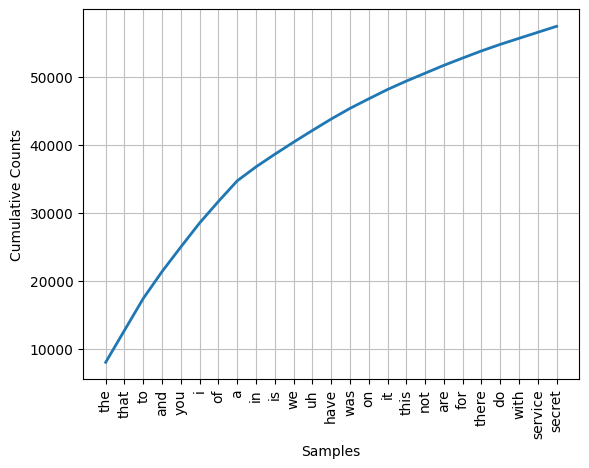

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [43]:
fd_1.plot(25, cumulative=True)

In [44]:
words_2 = list(chain.from_iterable([set(value) for value in documents.values()]))
fd_2 = FreqDist(words_2)
fd_2.most_common(25)

[('tragic', 4),
 ('years', 4),
 ('few', 4),
 ('there', 4),
 ('incident', 4),
 ('minister', 4),
 ('executing', 4),
 ('ensure', 4),
 ('chairman', 4),
 ('detail', 4),
 ('teams', 4),
 ('want', 4),
 ('dutch', 4),
 ('only', 4),
 ('basis', 4),
 ('may', 4),
 ('him', 4),
 ('could', 4),
 ('hesitation', 4),
 ('support', 4),
 ('injured', 4),
 ('selflessly', 4),
 ('these', 4),
 ('since', 4),
 ('donald', 4)]

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.wor)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
for doc_name, tokens in documents.items():
    documents[doc_name] = [word for word in tokens if word not in stop_words]
print("First 20 tokens from 'cheatle_hearing' after stopword removal:")
print(documents["cheatle_hearing"][:20])

First 20 tokens from 'cheatle_hearing' after stopword removal:
['transcript', 'presenting', 'active', 'threat', 'like', 'ask', 'director', 'cheeter', 'clarify', 'protoc', 'protocol', 'postponing', 'canceling', 'event', 'based', 'threat', 'events', 'july', 'meet', 'standards']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
words_3 = list(chain.from_iterable(documents.values()))
fd_3 = FreqDist(words_3)
list(vocab - set(fd_3.keys()))

['some',
 'your',
 'themselves',
 'nor',
 'his',
 'are',
 'ourselves',
 'such',
 'of',
 'until',
 'most',
 'own',
 'few',
 'can',
 'there',
 'ma',
 'through',
 'then',
 'having',
 'very',
 'below',
 'each',
 'you',
 'himself',
 'i',
 'here',
 'against',
 'these',
 'after',
 'off',
 'than',
 'no',
 'and',
 'up',
 'not',
 'who',
 'those',
 'in',
 'with',
 'be',
 'about',
 'were',
 'she',
 'her',
 'it',
 'yourself',
 'where',
 't',
 'all',
 'more',
 'into',
 'we',
 'its',
 'have',
 'an',
 'should',
 'down',
 'for',
 'does',
 'am',
 'being',
 're',
 'a',
 'to',
 'during',
 'that',
 'this',
 'by',
 's',
 'd',
 'before',
 'above',
 'from',
 'haven',
 'between',
 'same',
 'me',
 'only',
 'other',
 'them',
 'whom',
 'once',
 'again',
 'm',
 'itself',
 'under',
 'he',
 'o',
 'yours',
 'both',
 'because',
 'too',
 'now',
 'on',
 'while',
 'when',
 'him',
 'the',
 'my',
 'do',
 'is',
 'y',
 'why',
 'was',
 'if',
 'has',
 'or',
 'any',
 'as',
 'how',
 'further',
 'myself',
 'their',
 'our',
 'will

In [52]:
fd_3.most_common(25)

[('uh', 1715),
 ('service', 886),
 ('secret', 880),
 ('president', 636),
 ('um', 543),
 ('people', 527),
 ('would', 468),
 ('know', 467),
 ('trump', 443),
 ('think', 418),
 ('director', 404),
 ('security', 394),
 ('mr', 377),
 ('want', 345),
 ('thank', 329),
 ('one', 321),
 ('question', 312),
 ('going', 300),
 ('today', 289),
 ('answer', 288),
 ('threat', 286),
 ('information', 283),
 ('yes', 282),
 ('day', 280),
 ('roof', 275)]

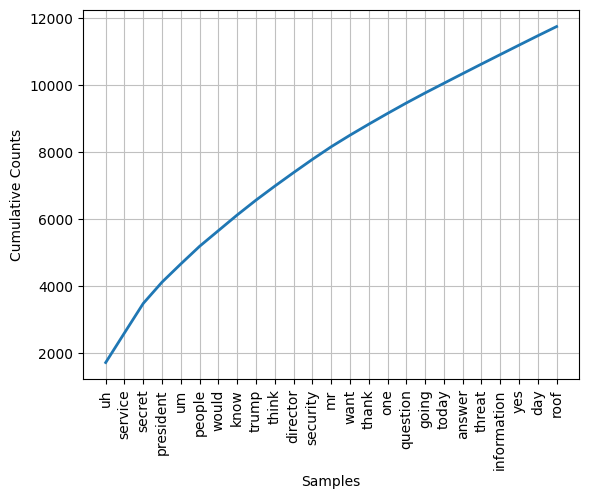

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [53]:
fd_3.plot(25, cumulative=True)

In [57]:
words_3

['transcript',
 'presenting',
 'active',
 'threat',
 'like',
 'ask',
 'director',
 'cheeter',
 'clarify',
 'protoc',
 'protocol',
 'postponing',
 'canceling',
 'event',
 'based',
 'threat',
 'events',
 'july',
 'meet',
 'standards',
 'think',
 'talking',
 'distinction',
 'suspicious',
 'behavior',
 'threat',
 'time',
 'individual',
 'identified',
 'displaying',
 'suspicious',
 'behavior',
 'still',
 'waiting',
 'interviews',
 'fbi',
 'determine',
 'identified',
 'individual',
 'suspicious',
 'behaviors',
 'question',
 'suspicious',
 'behavior',
 'suspicious',
 'behavior',
 'vary',
 'different',
 'events',
 'instance',
 'event',
 'president',
 'would',
 'heightened',
 'standard',
 'suspicious',
 'behavior',
 'think',
 'number',
 'ways',
 'someone',
 'could',
 'identified',
 'suspicious',
 'uh',
 'matter',
 'whether',
 'rally',
 'indoor',
 'event',
 'protecte',
 'think',
 'law',
 'enforcement',
 'citizens',
 'identify',
 'someone',
 'suspicious',
 'okay',
 'uh',
 'thank',
 'according',
 

In [ ]:
# POS tagging
from nltk import StanfordTagger
pos_tagged = nltk.pos_tag(words_3)

In [ ]:
import nltk

# Ensure necessary resources are downloaded
nltk.download('averaged_perceptron_tagger')

# Apply POS tagging to the cleaned tokens (words_3)
pos_tags = nltk.pos_tag(words_3)

# Example: Print the first 20 POS-tagged tokens
print("First 20 POS-tagged tokens:")
print(pos_tags[:20])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


First 20 POS-tagged tokens:
[('transcript', 'NN'), ('presenting', 'VBG'), ('active', 'JJ'), ('threat', 'NN'), ('like', 'IN'), ('ask', 'NNS'), ('director', 'NN'), ('cheeter', 'NN'), ('clarify', 'NN'), ('protoc', 'NN'), ('protocol', 'NN'), ('postponing', 'VBG'), ('canceling', 'VBG'), ('event', 'NN'), ('based', 'VBN'), ('threat', 'NN'), ('events', 'NNS'), ('july', 'JJ'), ('meet', 'JJ'), ('standards', 'NNS')]


## N-gram analysis